Prelim data

In [ ]:
# my jupyter notebook on my computer does not work so I used google drive, change these imports based off of your own computer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:

# CHANGE THESE PATHS ACCORDING TO YOUR OWN COMPUTER


# Paths to Excel files
inventory_path = '/content/drive/Sharedwithme/Projects(studentaccess)/BU Sustainability: Water Bottle stations/Team B/data/BottleFillersInventory-ongoing.xlsx'
high_volume_event_spaces_path = '/content/drive/Shared with me/Projects (student access)/HighVolumeEventSpaces.xlsx'
building_and_kitchen_list_path = '/content/drive/MyDrive/ProjectCS506/BuildingandKitchenList.xlsx'

# Convert Bottle Fillers Inventory to CSV
df_inventory = pd.read_excel(inventory_path)
df_inventory.to_csv('/content/drive/MyDrive/ProjectCS506/BU Sustainability: Water Bottle stations/Team B/data/inventory_existing_filling_stations.csv', index=False)
print('Converted Bottle Fillers Inventory to inventory_existing_filling_stations.csv')

# Convert High Volume Event Spaces to CSV
df_high_volume = pd.read_excel(high_volume_event_spaces_path)
df_high_volume.to_csv('/content/drive/MyDrive/ProjectCS506/BU Sustainability: Water Bottle stations/Team B/data/high_volume_event_spaces.csv', index=False)
print('Converted High Volume Event Spaces to high_volume_event_spaces.csv')

# Convert Building and Kitchen List to separate CSV files
xls = pd.ExcelFile(building_and_kitchen_list_path)

# Save "Building List" sheet
df_building_list = pd.read_excel(xls, sheet_name='Building List')
df_building_list.to_csv('/content/drive/MyDrive/ProjectCS506/BU Sustainability: Water Bottle stations/Team B/data/building_list.csv', index=False)
print('Converted Building List to building_list.csv')

# Save "Rooms with Kitchens" sheet
df_rooms_with_kitchens = pd.read_excel(xls, sheet_name='Rooms with Kitchens')
df_rooms_with_kitchens.to_csv('/content/drive/MyDrive/ProjectCS506/BU Sustainability: Water Bottle stations/Team B/data/rooms_with_kitchens.csv', index=False)
print('Converted Rooms with Kitchens to rooms_with_kitchens.csv')


In [ ]:
# Load the datasets
inventory_existing_stations = pd.read_csv('/content/drive/MyDrive/ProjectCS506/inventory_existing_filling_stations.csv')
building_list = pd.read_csv('/content/drive/MyDrive/ProjectCS506/building_list.csv')
rooms_with_kitchens = pd.read_csv('/content/drive/MyDrive/ProjectCS506/rooms_with_kitchens.csv')
high_volume_event_spaces = pd.read_csv('/content/drive/MyDrive/ProjectCS506/high_volume_event_spaces.csv')
density_data = pd.read_csv('/content/drive/MyDrive/ProjectCS506/updated_densitymap_hourly_cleaned.csv')

In [ ]:
# Quick data inspection
print("Top 5 rows of all data before cleaning:")
print(inventory_existing_stations.head())
print(building_list.head())
print(rooms_with_kitchens.head())
print(high_volume_event_spaces.head())
print(density_data.head())


# Strip whitespace from column names for all dataframes
inventory_existing_stations.columns = inventory_existing_stations.columns.str.strip()
building_list.columns = building_list.columns.str.strip()
rooms_with_kitchens.columns = rooms_with_kitchens.columns.str.strip()
high_volume_event_spaces.columns = high_volume_event_spaces.columns.str.strip()
density_data.columns = density_data.columns.str.strip()


Top 5 rows of all data before cleaning:
  Address A          Address B    Floor   \
0       100         Ashford St     First   
1       120         Ashford St     First   
2       120         Ashford St    Second   
3         8  St. Mary's Street  Basement   
4         8  St. Mary's Street     First   

                                         Description Accessibility  \
0  Hallway across from vending machines, across f...        Public   
1                             Kitchenette, Room 116A    Restricted   
2                              Kitchenette, Room 222    Restricted   
3                               Hallway by bathrooms           NaN   
4                         Hallway by electrical room           NaN   

  Handicap Accessible Space@Bu room  Quantity       Date Installed  \
0                 Yes           191       1.0                  NaN   
1                 Yes          116A       1.0                  NaN   
2                 Yes           222       1.0                  N

# **Listing Most Relevant Columns From Original Data Sets for Determining Bottle-Filling Station Locations**

**density_data**


*   building_floor
*   building_desc
*   density_cnt
*   capacity
*   dc_ratio

**high_volume_event_spaces**
*   Address
*   Room Name
*   Floor
*   Good Candidate (manually created column with Yes, No, or Maybe for whether a space is a good candidate for a filling station based on its highlighted color in the excel file)

**rooms_with_kitchens**
*   Building Description (BLDGDESC)
*   Building Type (BLDGTYPE)
*   Floor (FLOORCODE)
*   Classroom Use Extensions (EXTCLASS)
*   Office Facilities Room Use Extensions (EXTOFFICE)
*   General Use Facilities Room Use Extensions (EXTGENERAL)

**building_list**
*   Building Description
*   Building Type
*   Residential Building Type
*   Mechanical Ventilation

**inventory_existing_stations**
*   Address A
*   Address B
*   Floor
*   Accessibility

# **Cleaning Inventory Existing Station Data**

* removing any columns we will not need for the project
* combining Address A and Address B column to get the full address for existing water filling stations
* changing the floor entries into numeric entries so that they can be used with the other data sets

In [ ]:
# Removing columns not needed
inventory_existing_stations = inventory_existing_stations[['Address A', 'Address B', 'Floor', 'Accessibility']]

In [ ]:
# Standardize Addresses and Make lower case to be used with other data
inventory_existing_stations['Full Address'] = inventory_existing_stations['Address A'] + ' ' + inventory_existing_stations['Address B']
inventory_existing_stations.drop(['Address A', 'Address B'], axis=1, inplace=True)

# changing address to be lower case - same format as the other data sets
inventory_existing_stations['Full Address'] = inventory_existing_stations['Full Address'].str.lower()

<ipython-input-11-86a9502a14b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_existing_stations['Full Address'] = inventory_existing_stations['Address A'] + ' ' + inventory_existing_stations['Address B']
<ipython-input-11-86a9502a14b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_existing_stations.drop(['Address A', 'Address B'], axis=1, inplace=True)
<ipython-input-11-86a9502a14b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
# the Pool in fitrec is considered a floor, just making a comment so that we know this

# Standardize Floor Information
def standardize_floor_info(floor):
    # Handle NaN values
    if floor is None or pd.isna(floor):
        return np.nan
    # Convert all inputs to lower case strings to standardize processing
    floor_str = str(floor).strip().lower()

    # Map specific string values to their numeric equivalents
    floor_map = {
      'basement': 0, 'first': 1, 'second': 2, 'third': 3, 'fourth': 4, 'fifth': 5,
      'sixth': 6, 'seventh': 7, 'eighth': 8, 'ninth': 9, 'tenth': 10, 'eleventh': 11,
      'twelfth': 12, 'thirteenth': 13, 'fourteenth': 14, 'fifteenth': 15, 'sixteenth': 16,
      'seventeenth': 17, 'eighteenth': 18, 'nineteenth': 19, 'twentieth': 20,
      'lobby': 1, 'ground': 1, 'l1': 1, 'pool': -2, 'B': 0
    }

    # adding numeric string representations up to '30'
    for num in range(1, 31): floor_map[str(num)] = num

    # Check if the floor_str is directly in the map
    if floor_str in floor_map:
        return floor_map[floor_str]

    # Attempt to convert numbered floors like '23rd' to '23'
    elif floor_str.rstrip('thndstrd').isdigit():
        return int(floor_str.rstrip('thndstrd'))
    # Return the original string if no conditions are met
    # This line can be adjusted if you wish to handle unrecognized floors differently
    return floor_str



# Apply the function
inventory_existing_stations['Floor'] = inventory_existing_stations['Floor'].apply(standardize_floor_info)

# printing cleaned data
print(f"Top 5 rows after cleaning the inventory of existing stations data:")
print(inventory_existing_stations)


Top 5 rows after cleaning the inventory of existing stations data:
    Floor Accessibility         Full Address
0       1        Public       100 ashford st
1       1    Restricted       120 ashford st
2       2    Restricted       120 ashford st
3       0           NaN  8 st. mary's street
4       1           NaN  8 st. mary's street
..    ...           ...                  ...
207   NaN           NaN                  NaN
208   NaN           NaN                  NaN
209   NaN           NaN                  NaN
210   NaN           NaN                  NaN
211   NaN           NaN                  NaN

[212 rows x 3 columns]


<ipython-input-12-07e148a5a496>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_existing_stations['Floor'] = inventory_existing_stations['Floor'].apply(standardize_floor_info)


**Columns we kept from the inventory of existing stations data and why**


*   Floor - to be able to use alongside the rooms with kitchens and density data so that we are able to find the floors that have no existing water filling stations to find possible installation locations
*   Accessibility - if a water filling station is not accessible by everyone, one may need to be installed that is accessable by everyone
*  Full Address - we will need to use this alongside the floor to find out exact locations where to find possible installation locations in coordination with the density, kitchen, and building list data




# **Cleaning the rooms_with_kitchens data**


* removing any columns we will not be using
* make any floor B entries into floor 0 so that it is an integer value to be able to be used along with the other data sets
* keep a column only when it is believed to be publicly available, so whenever it fulfills any of these things (this is what I believe means it is a publicly avaialble kitchen)
**   a value of 'Residential' in the Building Type (BLDGTYPE)columns
**   an existing value (meaning it is not empty) in the Classroom Use Extensions (EXTCLASS)  columns
**   an existing value (meaning it is not empty) in the General Use Facilities Room Use Extensions (EXTGENERAL) column



In [ ]:
# some columns that are originally not B or a number are being changed to NaN values because of this, might need to change this
rooms_with_kitchens['Floor (FLOORCODE)'] = rooms_with_kitchens['Floor (FLOORCODE)'].apply(standardize_floor_info)

# Step 2: Filter rows based on conditions
# A value of 'Residential' in BLDGTYPE or non-empty in EXTCLASS or EXTGENERAL
rooms_with_kitchens = rooms_with_kitchens[
    (rooms_with_kitchens['Building Type (BLDGTYPE)'] == 'Residential') |
    (rooms_with_kitchens['Classroom Use Extensions (EXTCLASS)'].notnull()) |
    (rooms_with_kitchens['General Use Facilities Room Use Extensions (EXTGENERAL)'].notnull())
]

# removing columns not needed
rooms_with_kitchens = rooms_with_kitchens[['Building Description (BLDGDESC)', 'Building Type (BLDGTYPE)', 'Floor (FLOORCODE)']]

# changing address to be lower case - same format as the other data sets
rooms_with_kitchens['Building Description (BLDGDESC)'] = rooms_with_kitchens['Building Description (BLDGDESC)'].str.lower()


# printing cleaned kitchens with rooms data
print(f"Top 5 rows after cleaning the rooms with kitchens data:")
print(rooms_with_kitchens.head())

Top 5 rows after cleaning the rooms with kitchens data:
                       Building Description (BLDGDESC)  \
229  915 commonwealth avenue                       ...   
230  925 commonwealth avenue                       ...   
231  925 commonwealth avenue                       ...   
232  925 commonwealth avenue                       ...   
235  925 commonwealth avenue                       ...   

                              Building Type (BLDGTYPE) Floor (FLOORCODE)  
229  Student Support                               ...                 1  
230  Athletic                                      ...                c2  
231  Athletic                                      ...                g1  
232  Athletic                                      ...                g1  
235  Athletic                                      ...                 1  


**Columns we kept from the rooms with kitchens data and why**

*   Building Description (BLDGDESC) - contains the address for the building, going to be used with floor to know where we may not want to install new filling stations
*  Floor (FLOORCODE) - contains the floor where the publicly accessible kitchen is, so we know what floors of buildings we may not want to install new filling stations because of kitchen access
*   Building Type (BLDGTYPE) - contains what type of building it is, if a building is academic or athletic, we may still want to install filling stations there even if there is a kitchen

**Cleaned data only contains rows that have the data for publicly accessible kitchens, filtered out the non publicly accessible kitchens because they are not of importance to our project and just crowd the data.**


# **Cleaning the building list data**

* removing any columns that will not be needed for the project

In [ ]:
# Removing not needed columns
building_list = building_list[['Building Description', 'Building Type', 'Residential Building Type', 'Mechanical Ventilation', 'Maintained by BU FMO']]

# changing address to be lower case - same format as the other data sets
building_list['Building Description'] = building_list['Building Description'].str.lower()


print(f"Top 5 rows after cleaning the building list data:")
print(building_list.head())

Top 5 rows after cleaning the building list data:
   Building Description   Building Type Residential Building Type  \
0      1 buswell street     Residential     Small Dormitory-Style   
1     1 university road        Academic                       NaN   
2       10 buick street     Residential           Apartment Style   
3  10 cottage farm road     Residential                     House   
4       10 lenox street  Administrative                       NaN   

  Mechanical Ventilation Maintained by BU FMO  
0                     No                  YES  
1                    Yes                  YES  
2                    Yes                  YES  
3                Partial                  YES  
4                    Yes                  YES  


<ipython-input-14-ca7019bb0395>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_list['Building Description'] = building_list['Building Description'].str.lower()


**Columns we kept from the building list data and why**

*   Building Description - contains the buildings address so that this data can be used in coordination with all of the other data sets
*   Building Type - may want to prioritize installing filling stations in athletic and academic buildings over residential and administrative buildings
*  Residential Building Type - if a residential building is apartment style we will check with the kitchen data and if there is a kitchen there is no need to install a water filling station
*  Mechanical Ventilation - a.k.a. Air Conditioning, we will want to prioritize installation of new filling stations in buildings that do not have mechanical ventillation (A/C)
*  Maintained by BU FMO - if a building has maintenance, we should maybe give it higher priority because we know that installing a filling station there would be able to run properly and be fixed when broken vs not having maintenance might be a problem if we suggest to install one and then it breaks and is not fixed for long periods of time



# **Cleaning the high volume event spaces data**


We manually cleaned this data because it only contains 29 rows, in manual cleaning:
*   changed the Floor column to contain an integer entry for floor instead of a string entry for floor
*   added a new column called "Good Candidate", because on the original excel sheet, columns were highlighted to indicate their candidacy, so we created this new column that contains "Yes" if its a good candidate, "Maybe" if it is maybe a good candidate, or "No" if it is not a good candidate

In the code below:
* removing any columns that will not be needed for the project


In [ ]:
# Removing not needed columns
high_volume_event_spaces = high_volume_event_spaces[['Address', 'Room Name', 'Floor', 'Good Candidate']]

# changing address to be lower case - same format as the other data sets
high_volume_event_spaces['Address'] = high_volume_event_spaces['Address'].str.lower()

print(f"Top 5 rows after cleaning the high volume event spaces data:")
print(high_volume_event_spaces.head())

Top 5 rows after cleaning the high volume event spaces data:
                        Address                                Room Name  \
0       925 commonwealth avenue           Agganis Arena Burke Club Room    
1       925 commonwealth avenue  Agganis Arena Friends of Hockey Lounge    
2            285 babcock street              Case Center Eilberg Lounge    
3   675-725 commonwealth avenue   College of Arts & Sciences Classrooms    
4        640 commowealth avenue         College of Communication Lounge    

  Floor Good Candidate  
0     1          Maybe  
1     1          Maybe  
2     3             No  
3   NaN             No  
4     1          Maybe  


<ipython-input-15-986820513e30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volume_event_spaces['Address'] = high_volume_event_spaces['Address'].str.lower()


**Columns we kept from the high volume event spaces data and why**


*   Address - with the floor and the address we can compare this data set in coordination with all of the other data sets
*   Floor - with the floor and the address we can compare this data set in coordination with all of the other data sets
*   Room Name - for the final outcome of the project, we will go back to this to find the names of the high volume event spaces if new water filling stations should be installed
*  Good Candidate - Tells us whether a space is a good candidate or not for new filling stations, prioritize good candidate high volume event spaces for installing new filling locations

# **Cleaning the density data**

* removing any columns that will not be needed for the project

In [ ]:
# Remove columns not needed
density_data = density_data[['date', 'hour', 'building_type', 'building_floor', 'building_desc', 'density_cnt', 'capacity', 'dc_ratio']]

# changing address to be lower case - same format as the other data sets
density_data['building_desc'] = density_data['building_desc'].str.lower()

# remove rows where the 'hour' is 1, 2, 3, 4, or 5
density_data = density_data[~density_data['hour'].isin([1, 2, 3, 4, 5])]

print(f"Top 5 rows after cleaning the density data:")
print(density_data.head())

Top 5 rows after cleaning the density data:
            date  hour   building_type building_floor  \
1608  2021-03-31     6  Administrative              3   
1609  2021-03-31     6        Academic              2   
1610  2021-03-31     6        Academic              3   
1611  2021-03-31     6  Administrative              1   
1612  2021-03-31     6     Residential              2   

                building_desc  density_cnt  capacity  dc_ratio  
1608  881 commonwealth avenue            2        70      0.03  
1609  808 commonwealth avenue            3       317      0.01  
1610  808 commonwealth avenue            1       185      0.01  
1611     163-179 amory street            8       103      0.08  
1612       112 bay state road            1         3      0.33  


**Columns we kept from the density data and why**

*  date - going to be used with time to analyze foot traffic over time to identify the areas with high foor traffic over longer time periods
*  time - going to be used with date to analyze foot traffic over time to identify the areas with high foor traffic over longer time periods
*   building_floor - to identify the specific floors of buildings with the highest foot traffic
*   building_desc - to identify the specific floors of buildings with the highest foot traffic
*  density_cnt - the actual count of people detected
*  capacity - there are potential maximum capacities for spaces, which may impact the density count, making it lower in spaces with low capacities, so this needs to be factored in to our project
*  dc_ratio - may be needed to measure density for spaces with capacities


# **Measurements from the density data**



In [ ]:
# Group the data by 'building_floor' and 'building_desc'
density_data_filtered = density_data
grouped_data = density_data_filtered.groupby(['building_floor', 'building_desc'])

# Calculate summary statistics for each group
density_summary = grouped_data.agg(
    average_density=('density_cnt', 'mean'),
    max_density=('density_cnt', 'max'),
    total_density=('density_cnt', 'sum'),
    average_capacity=('capacity', 'mean'),
    # Calculate dc_ratio_avg efficiently without replacing zero capacities in advance
    dc_ratio_avg=('dc_ratio', 'mean')
)

# Reset index if you want 'building_floor' and 'building_desc' back as columns
density_summary.reset_index(inplace=True)


print("Density summary after calculations for density :")
print(density_summary.head())

Density summary after calculations for density :
  building_floor      building_desc  average_density  max_density  \
0              0     135 ivy street         1.673848           12   
1              0  531 beacon street         6.995029           31   
2              1   1 buswell street         2.080921           10   
3              1  1 university road        58.593610          351   
4              1    10 buick street        39.107312          194   

   total_density  average_capacity  dc_ratio_avg  
0           2797          0.000000      0.000000  
1          94272          0.000000      0.000000  
2           2803          7.000000      0.297194  
3        1190212        314.183183      0.190425  
4         801739        150.332472      0.260356  


# **Saving all of our cleaned data to new CSV's**

In [ ]:
# NEEDS TO BE DONE!

# **Creating graph showing the top 10% calculated density floors in buildings**

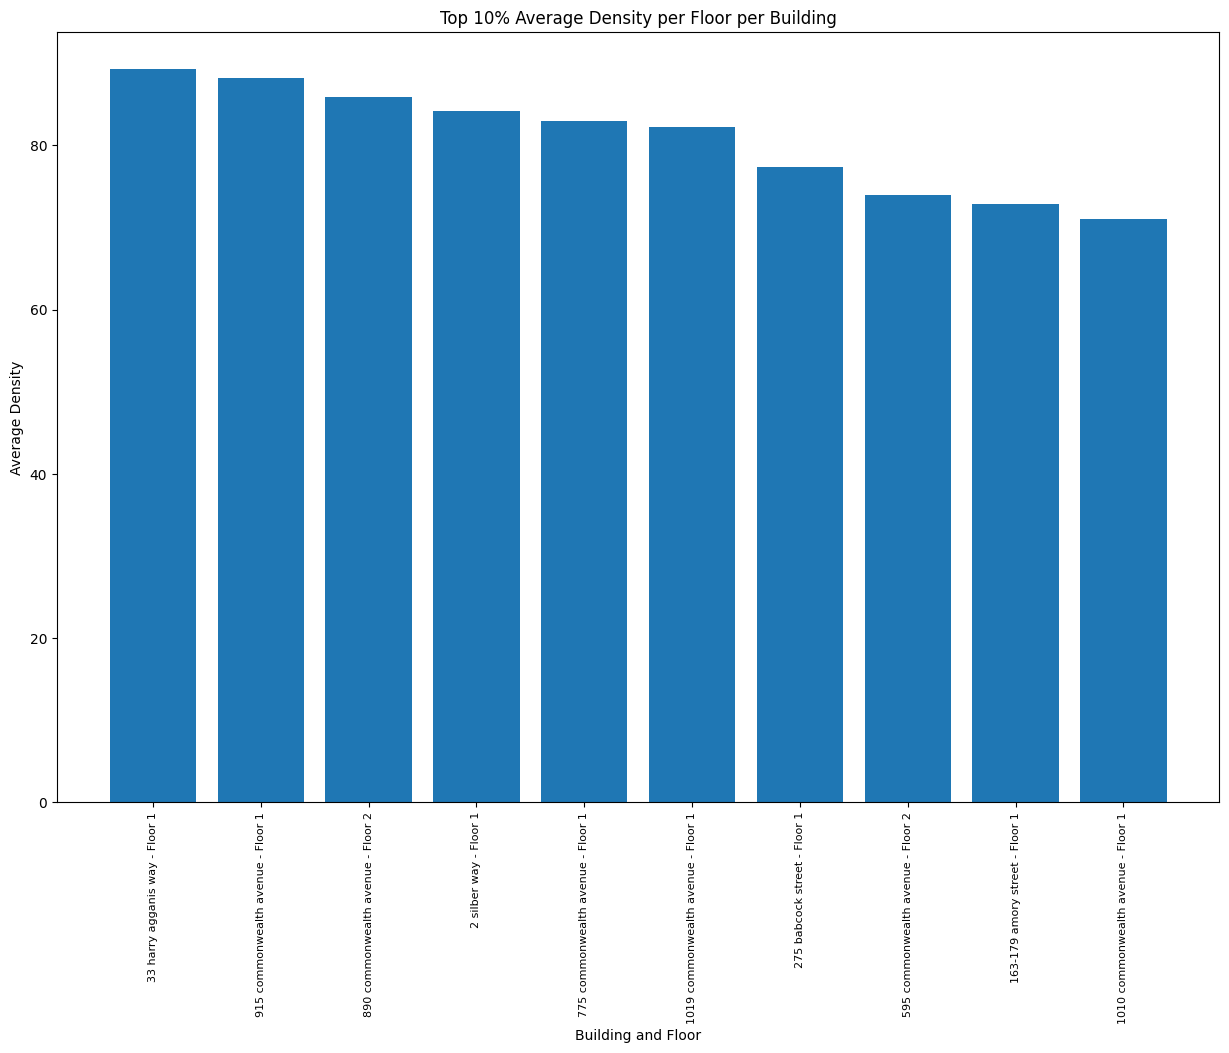

In [ ]:
# Calculate the 80th percentile of 'average_density' to get the top 10%
threshold = np.percentile(density_summary['average_density'], 90)

# Filter the DataFrame to keep only the top 20%
top_10_percent_density = density_summary[density_summary['average_density'] >= threshold]

# Sort this filtered data for better visualization, if desired
top_10_percent_density_sorted = top_10_percent_density.sort_values(by='average_density', ascending=False)

# Create a new column for plotting that combines building and floor
top_10_percent_density_sorted['building_floor_desc'] = top_10_percent_density_sorted['building_desc'] + ' - Floor ' + top_10_percent_density_sorted['building_floor'].astype(str)

# Plotting the top 10%
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed

# Create a bar chart for the top 10%
ax.bar(top_10_percent_density_sorted['building_floor_desc'].head(10), top_10_percent_density_sorted['average_density'].head(10))

# Improve the chart
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
ax.tick_params(axis='x', labelsize=8)
plt.xlabel('Building and Floor')
plt.ylabel('Average Density')
plt.title('Top 10% Average Density per Floor per Building')


# Show plot
plt.show()

# **Finding top 10% locations on campus with the highest foot traffic and no current water filling station**

<ipython-input-19-3ea84394d74a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_density', y='building_desc', data=top_10_percent_sorted.head(10), palette="coolwarm")


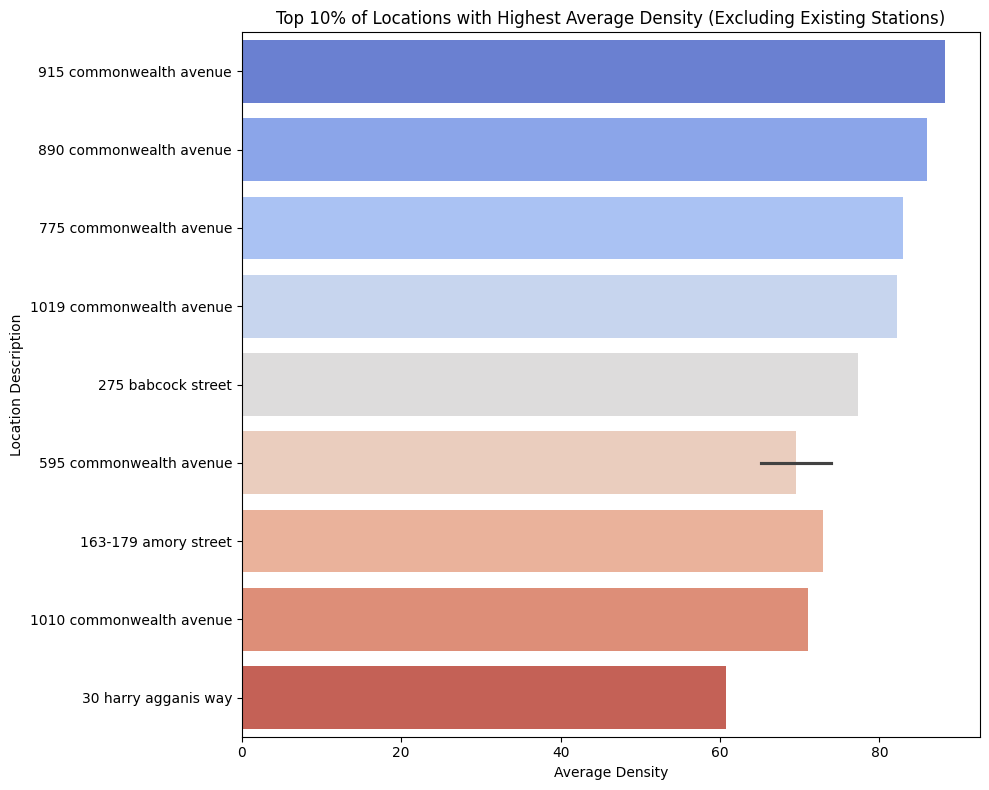

In [ ]:
# Creating a marker for rows that exist in both DataFrames
merged_data = pd.merge(density_summary, inventory_existing_stations[['Full Address']], left_on='building_desc', right_on='Full Address', how='left', indicator=True)

# Filtering out the matched rows (i.e., those that exist in inventory_existing_stations)
filtered_data = merged_data[merged_data['_merge'] == 'left_only'].copy()

# Now, let's identify the top 10% locations with the highest average density
filtered_data['rank_pct'] = filtered_data['average_density'].rank(pct=True)
top_10_percent = filtered_data[filtered_data['rank_pct'] > 0.9]

# Sorting the top 10% locations by their average density in descending order for better visualization
top_10_percent_sorted = top_10_percent.sort_values(by='average_density', ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 8))
sns.barplot(x='average_density', y='building_desc', data=top_10_percent_sorted.head(10), palette="coolwarm")
plt.title('Top 10% of Locations with Highest Average Density (Excluding Existing Stations)')
plt.xlabel('Average Density')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

# **Identifying Peak Times of Foot Traffic**

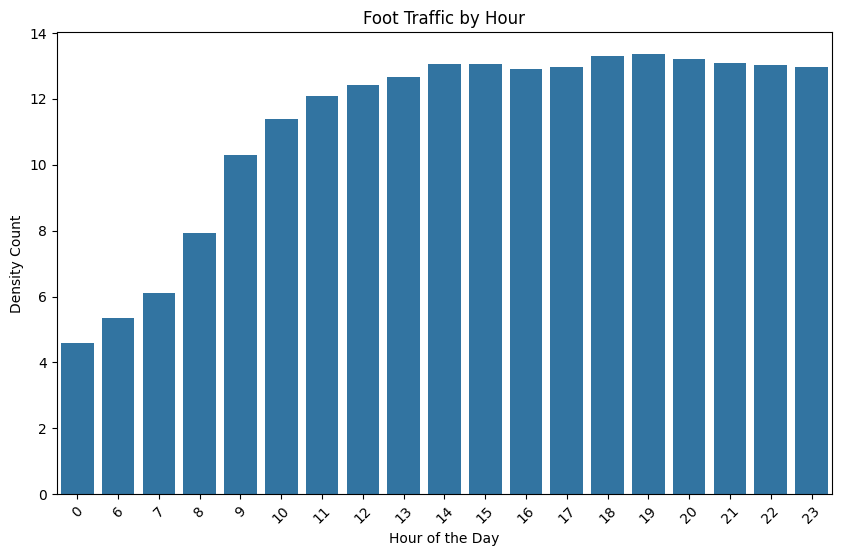

In [ ]:
# Group by time and sum density counts to find peak hours
peak_times = density_data_filtered.groupby('hour')['density_cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='density_cnt', data=peak_times)
plt.title('Foot Traffic by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Density Count')
plt.xticks(rotation=45)
plt.show()

# **Average Density Data for each Building Type**

<ipython-input-21-fa736e75cd8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='building_type', y='density_cnt', data=avg_density_by_type, palette="viridis")


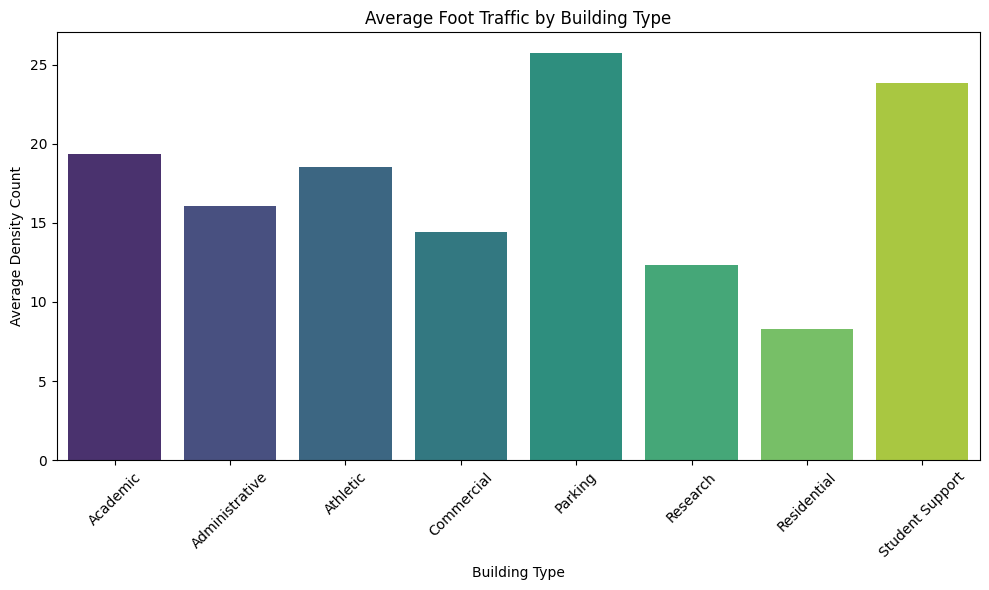

In [ ]:
# Group by 'building_type' and calculate the average density count
avg_density_by_type = density_data_filtered.groupby('building_type')['density_cnt'].mean().reset_index()

# Plotting the average foot traffic by building type
plt.figure(figsize=(10, 6))
sns.barplot(x='building_type', y='density_cnt', data=avg_density_by_type, palette="viridis")
plt.title('Average Foot Traffic by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Density Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# **Total Number of Each Building Type on Campus**

<ipython-input-22-753119e52a5a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Building Type', y='Total', data=building_counts, palette="viridis")


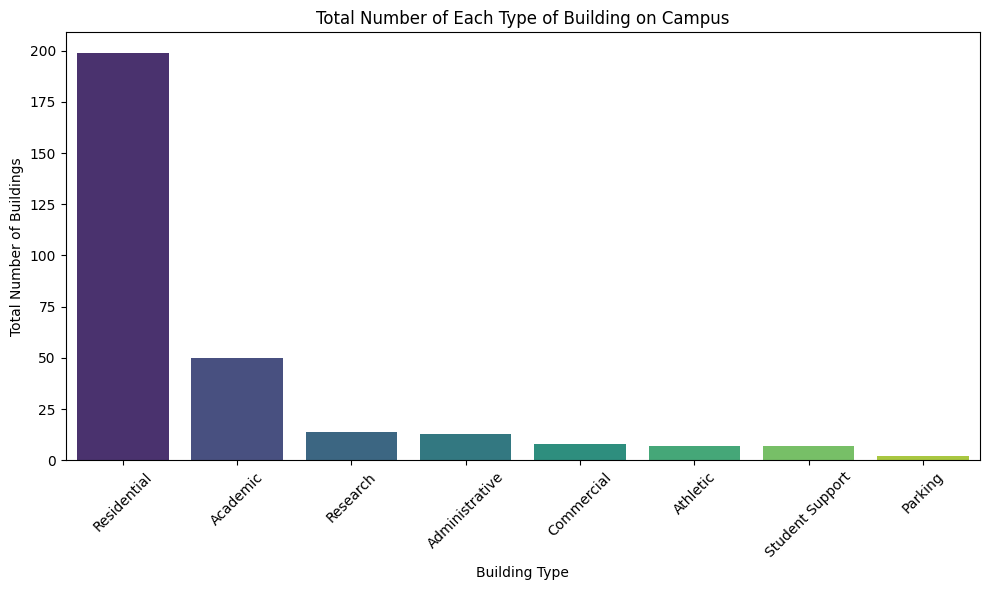

In [ ]:
# Counting the total number of each type of building
building_counts = building_list['Building Type'].value_counts().reset_index()
building_counts.columns = ['Building Type', 'Total']

# Plotting the total number of each type of building
plt.figure(figsize=(10, 6))
sns.barplot(x='Building Type', y='Total', data=building_counts, palette="viridis")
plt.title('Total Number of Each Type of Building on Campus')
plt.xlabel('Building Type')
plt.ylabel('Total Number of Buildings')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Counting the number of wifi data for each location

In [ ]:
# Group by 'building_desc' and 'building_floor', then count the number of rows for each group
address_floor_counts = density_data.groupby(['building_desc', 'building_floor']).size()

# Reset the index if you want the result as a DataFrame
address_floor_counts = address_floor_counts.reset_index(name='count')

print("Count of rows for each address and floor combination:")
print(address_floor_counts)


Count of rows for each address and floor combination:
                building_desc building_floor  count
0            1 buswell street              1   1347
1            1 buswell street              2  10459
2            1 buswell street              3   5344
3            1 buswell street              4   8732
4            1 buswell street              b   2694
...                       ...            ...    ...
1153      98 mountfort street              3  10391
1154      98 mountfort street              4  11627
1155  985 commonwealth avenue              1  12171
1156  985 commonwealth avenue              2  13871
1157  985 commonwealth avenue              m   6606

[1158 rows x 3 columns]


There are different numbers of rows for each location, so need to average the data for each location

In [ ]:
# Group by 'building_desc' and 'building_floor', then calculate the mean of 'density_cnt' for each group
average_density = density_data.groupby(['building_desc', 'building_floor'])['density_cnt'].mean()

# Reset the index to turn the Series back into a DataFrame and rename the column accordingly
average_density = average_density.reset_index(name='average_density_cnt')

print("Average density count for each address and floor:")
print(average_density)

Average density count for each address and floor:
                building_desc building_floor  average_density_cnt
0            1 buswell street              1             2.080921
1            1 buswell street              2             3.869968
2            1 buswell street              3             2.165232
3            1 buswell street              4             2.821919
4            1 buswell street              b             1.791017
...                       ...            ...                  ...
1153      98 mountfort street              3             3.379463
1154      98 mountfort street              4             3.007569
1155  985 commonwealth avenue              1             6.194561
1156  985 commonwealth avenue              2             7.429313
1157  985 commonwealth avenue              m             2.636088

[1158 rows x 3 columns]


# **Current Impact from Density Data **

In [ ]:
print(density_data_filtered.columns)
density_data_filtered.head()

In [ ]:
print(inventory_existing_stations.columns)
inventory_existing_stations.head()

In [ ]:
# density_data_filtered
 # inventory_existing_stations

matches = df1[''].isin(df2['']).sum()

print(f"Number of address that exist in both density data and inventory existing station data: {matches}")


In [ ]:
# making a data frame containing address, floor, and average DAILY density cnt
daily_avg_density = (
    density_data_filtered.groupby(['building_desc', 'building_floor', 'date'])['density_cnt']
    .sum()
    .reset_index()
    .groupby(['building_desc', 'building_floor'])['density_cnt']
    .mean()
    .reset_index()
)

# Renaming the column to make it clear it's an average daily count
daily_avg_density.rename(columns={'density_cnt': 'avg_daily_density_cnt'}, inplace=True)

print(daily_avg_density)

In [ ]:
# adding a column to the data frame with a 1 if a water filling station exists at that location, and a 0 if it does not exist

merged_df = pd.merge(daily_avg_density,
                     inventory_existing_stations,
                     left_on=['building_desc', 'building_floor'],
                     right_on=['Full Address', 'Floor'],
                     how='left',
                     indicator=True)

# Convert the _merge indicator to 1s and 0s
merged_df['exists_in_inventory'] = (merged_df['_merge'] == 'both').astype(int)

# Drop the columns from inventory_existing_stations and the merge indicator
final_df = merged_df.drop(columns=['Floor', 'Accessibility', 'Full Address', '_merge'])

print(final_df)

In [ ]:
sum_density_for_inventory = final_df.loc[final_df['exists_in_inventory'] == 1, 'avg_daily_density_cnt'].sum()

print(f"Sum of avg_daily_density_cnt for rows with a station: {sum_density_for_inventory}")

In [ ]:
sum_of_top_5_density_counts = final_df['avg_daily_density_cnt'].nlargest(5).sum()

print(f"Sum of the top 5 avg_daily_density_cnt values: {sum_of_top_5_density_counts}")

In [ ]:
sum_new_proposed_impact = sum_density_for_inventory + sum_of_top_5_density_counts
print(f"Sum of the new proposed impacts: {sum_new_proposed_impact}")